In [16]:
import cv2
path_to_video = 'dataset.mp4'
fgbg = cv2.createBackgroundSubtractorMOG2() #instance of Mixture Gaussian
capture = cv2.VideoCapture(path_to_video) #used to read frame from video
for i in range(6): #read 6 first frame
    (grabbed, frame) = capture.read()
    fgMask = fgbg.apply(frame) #apply backgroundsubtraction to frame
cv2.imshow('Frame', frame)
cv2.imshow('FG Mask', fgMask)
cv2.waitKey(0)
capture.release() # free up system resources
cv2.destroyAllWindows() 
print('Sum of intensities in fgMask is: ', sum(sum(fgMask)))

Sum of intensities in fgMask is:  38110


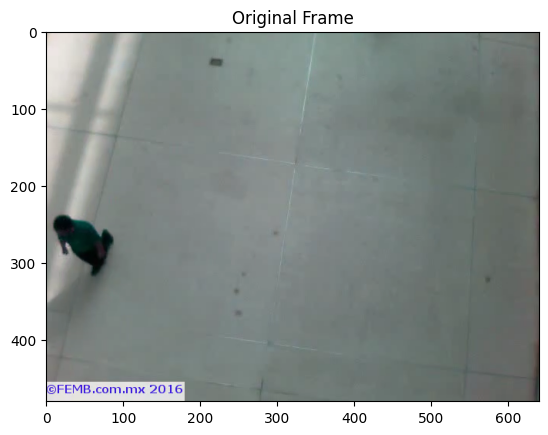

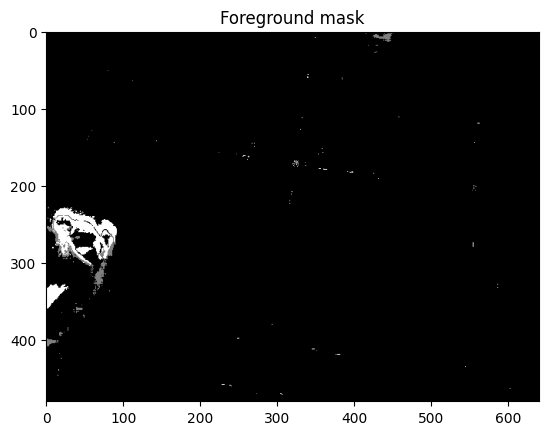

In [18]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Original Frame')
plt.show()

plt.imshow(fgMask, cmap='gray')
plt.title('Foreground mask')
plt.show()

Sum of intensities in fgMask is:  54829


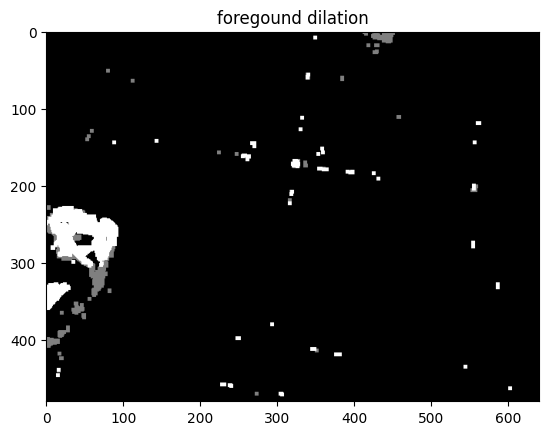

In [21]:
#Exercise 2: backgound subtraction with dilation
import cv2
path_to_video = 'dataset.mp4'
fgbg = cv2.createBackgroundSubtractorMOG2()
capture = cv2.VideoCapture(path_to_video)

for i in range(6):
    (grabbed, frame) = capture.read()
    fgMask = fgbg.apply(frame)

# cv2.imshow('Frame', frame)
# cv2.imshow('FG Mask', fgMask)
# cv2.waitKey(0)
# capture.release()

#Using dilation
fgMask = cv2.dilate(fgMask, None, iterations=2)
print("Sum of intensities in fgMask is: ", sum(sum(fgMask)))
plt.imshow(fgMask, cmap='gray')
plt.title('foregound dilation')
plt.show()

Sum of intensities in fgMask is:  17280


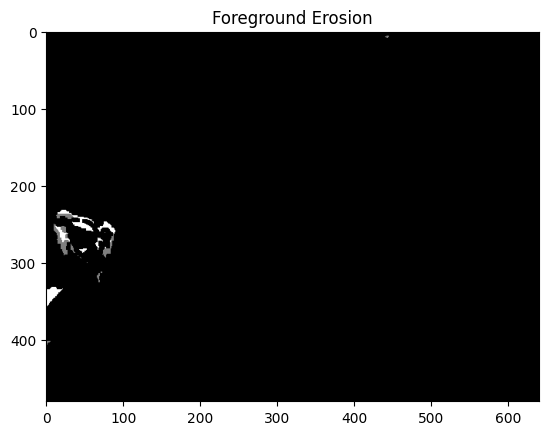

In [24]:
#Exercise 3: backgroundsubtraction with erosion
import cv2
path_to_video = 'dataset.mp4'
fgbg = cv2.createBackgroundSubtractorMOG2()
capture = cv2.VideoCapture(path_to_video)

for i in range(6):
    (grabbed, frame) = capture.read()
    fgMask = fgbg.apply(frame)

# cv2.imshow('Frame', frame)
# cv2.imshow('FG Mask', fgMask)
# cv2.waitKey(0)
# capture.release()
#Using erosion
fgMask = cv2.erode(fgMask, None, iterations=2)
print('Sum of intensities in fgMask is: ', sum((sum(fgMask))))

plt.imshow(fgMask, cmap='gray')
plt.title('Foreground Erosion')
plt.show()


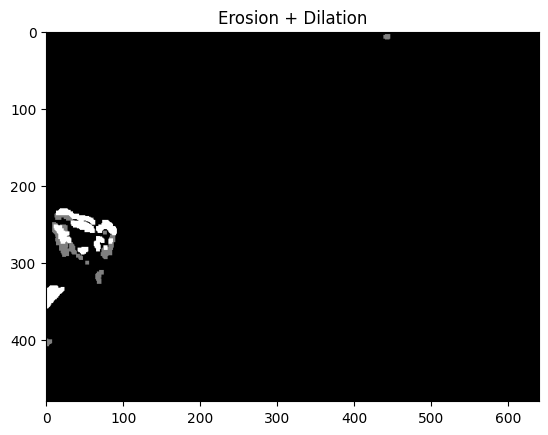

In [25]:
#Exercise 4: Using both erosion and dilation
import cv2
path_to_video = 'dataset.mp4'
fgbg = cv2.createBackgroundSubtractorMOG2()
capture = cv2.VideoCapture(path_to_video)

for i in range(6):
    (grabbed, frame) = capture.read()
    fgMask = fgbg.apply(frame)

#Using erosion + dilation
fgMask = cv2.erode(fgMask, None, iterations=2)
fgMask = cv2.dilate(fgMask, None, iterations=2)

plt.imshow(fgMask, cmap='gray')
plt.title('Erosion + Dilation')
plt.show()
# result image reduces noise

The locations of the foreground objects are:  [[320, 178]]


(-0.5, 639.5, 479.5, -0.5)

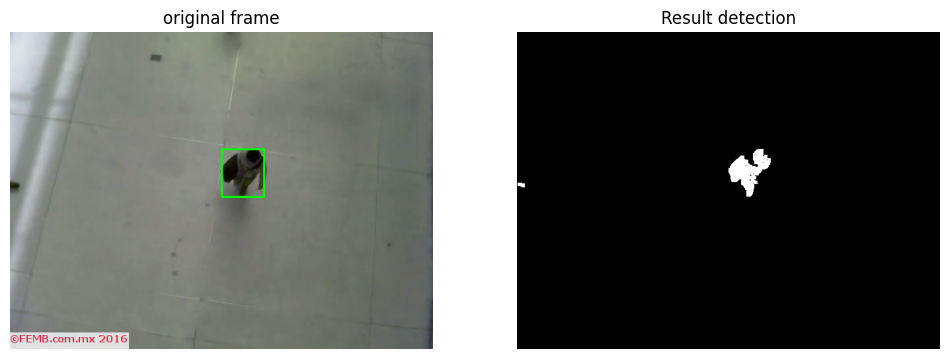

In [33]:
#Exercise 5: Contour Detection 
import cv2
path_to_video = 'dataset.mp4'
fgbg = cv2.createBackgroundSubtractorMOG2()
capture = cv2.VideoCapture(path_to_video)

for i in range(100):
    (grabbed, frame) = capture.read()
    fgMask = fgbg.apply(frame)

#Using dilation and erosion
fgMask = cv2.threshold(fgMask,200, 255, cv2.THRESH_BINARY)[1]
fgMask = cv2.erode(fgMask, None, iterations=2)
fgMask = cv2.dilate(fgMask, None, iterations=2)


contours_list, hierarchy = cv2.findContours(
    fgMask, 
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE,
    # Find contours
)

contours_result = []
for c in contours_list:
    if cv2.contourArea(c) < 1000:
        continue

    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
    contours_result.append([x,y])

print('The locations of the foreground objects are: ', (contours_result))

# cv2.imshow('Frame', frame)
# cv2.imshow('FG Mask', fgMask)
# cv2.waitKey(0)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(frame, cmap='gray')
plt.title('original frame')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(fgMask, cmap='gray')
plt.title('Result detection')
plt.axis('off')




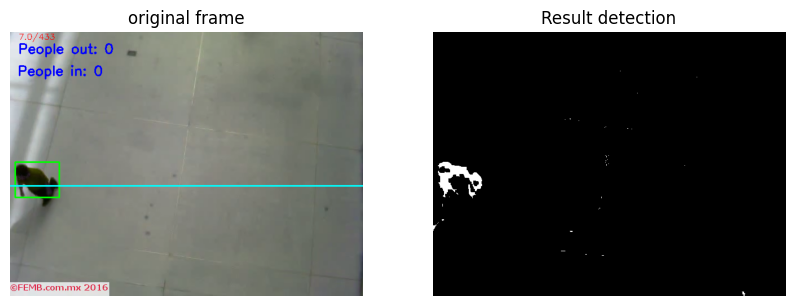

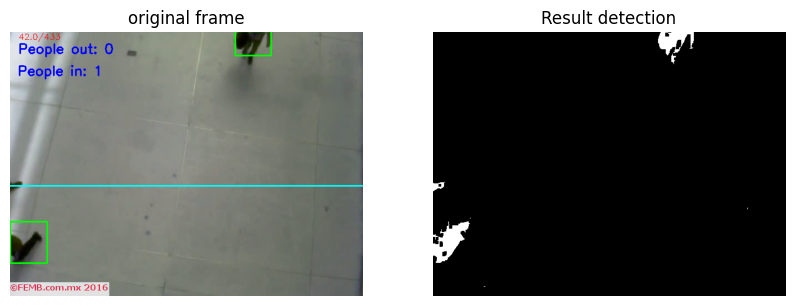

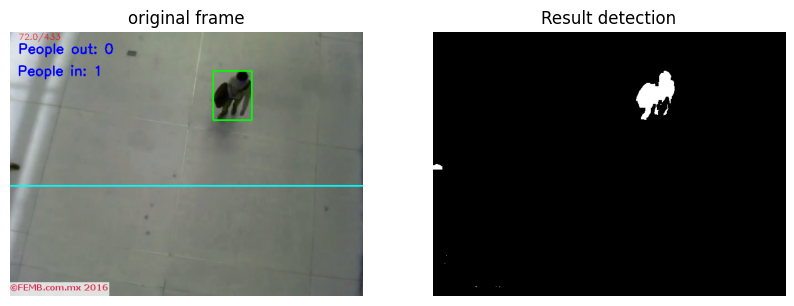

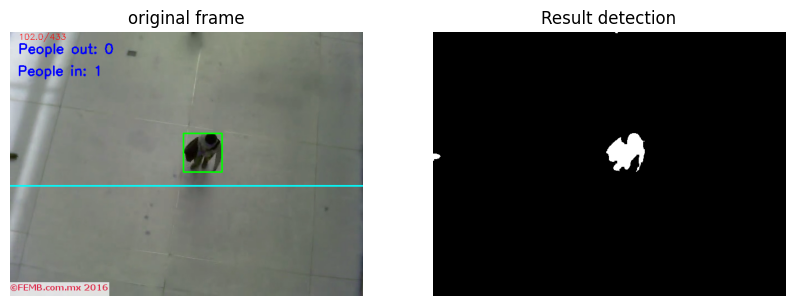

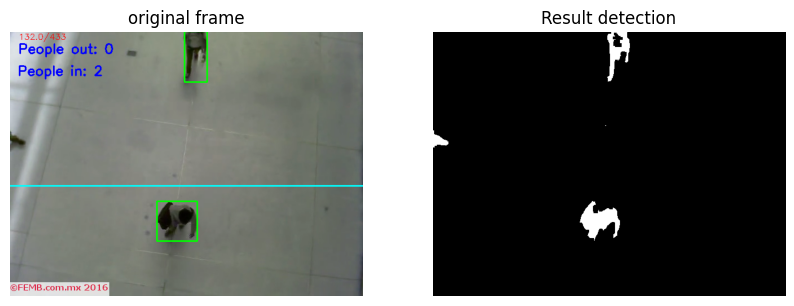

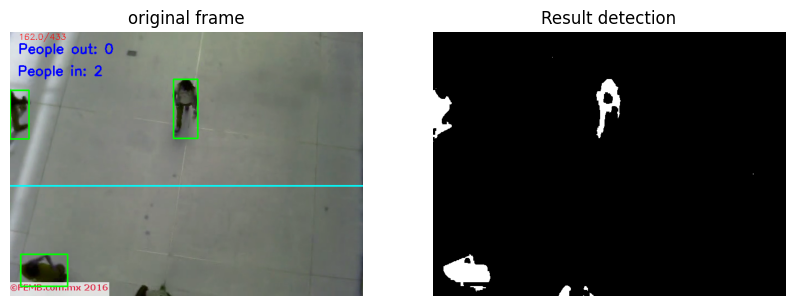

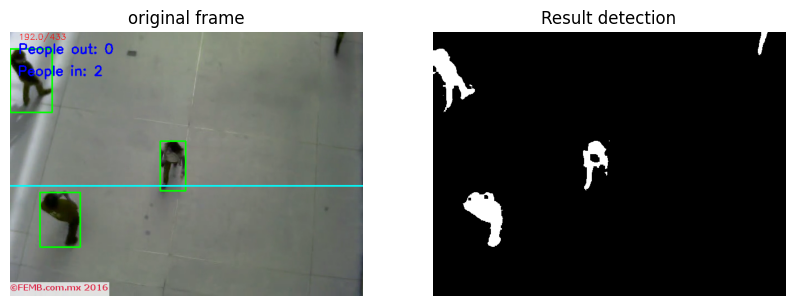

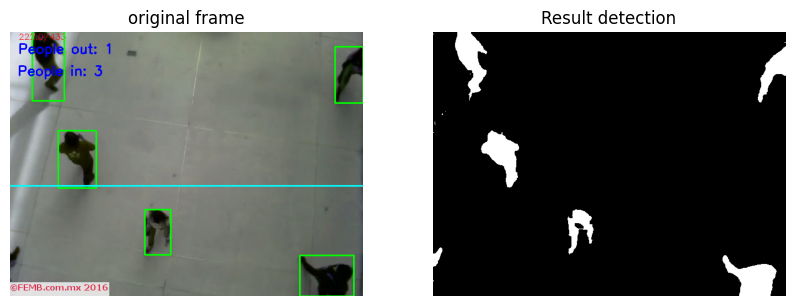

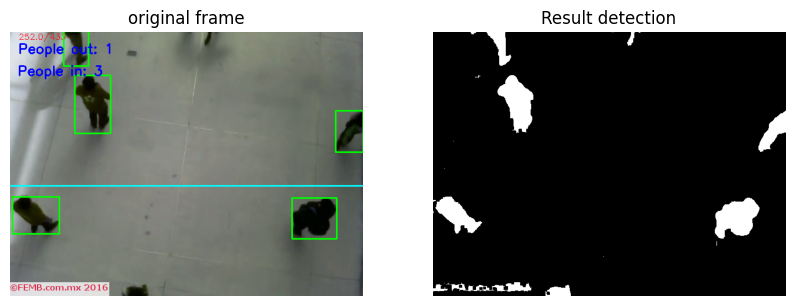

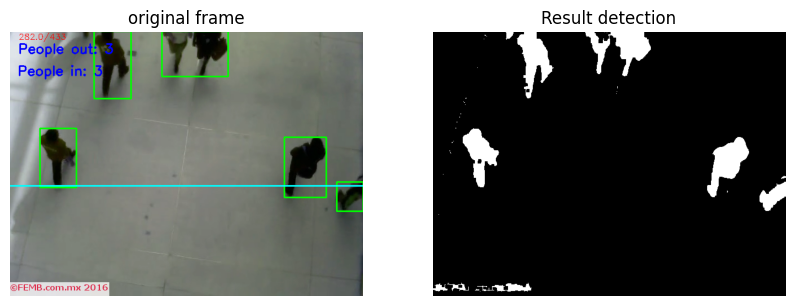

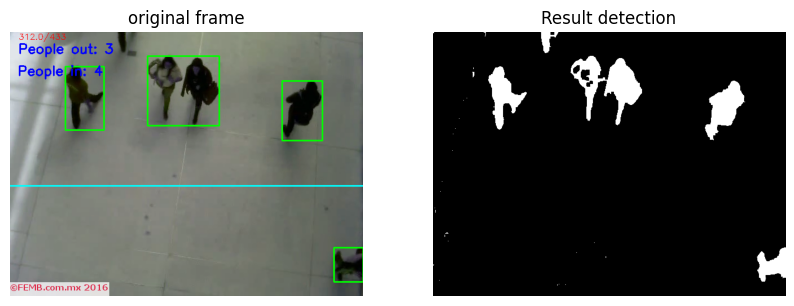

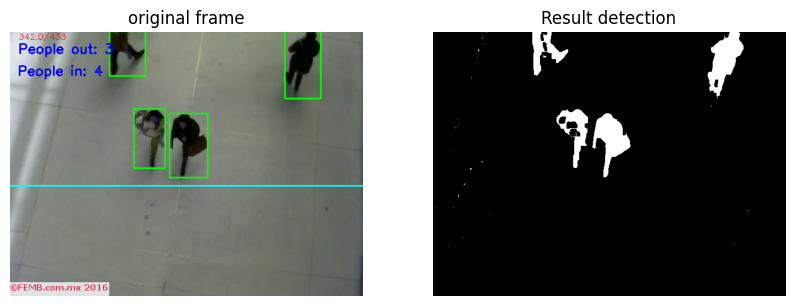

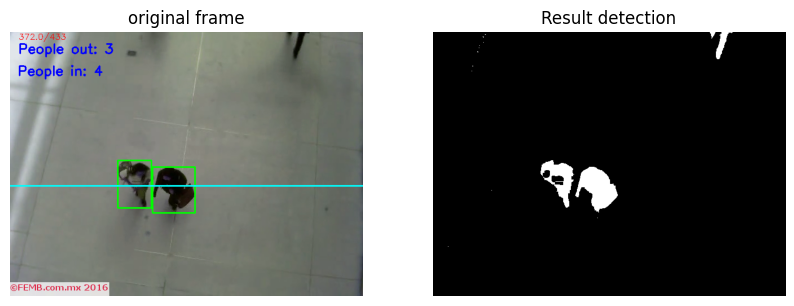

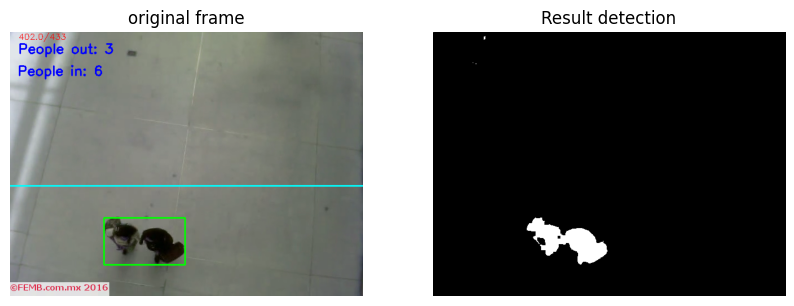

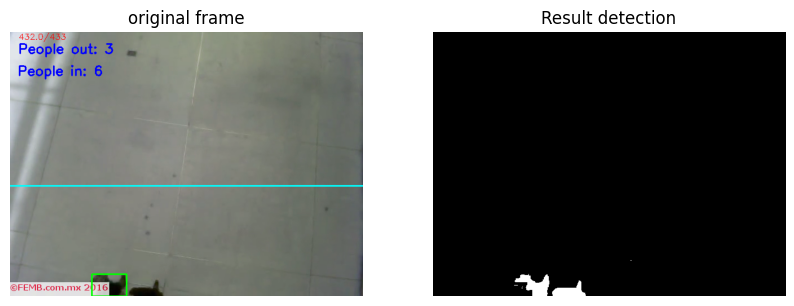

In [5]:
#Exercise 6
import cv2
import matplotlib.pyplot as plt
path_to_video = 'dataset.mp4'
fgbg = cv2.createBackgroundSubtractorMOG2()
capture = cv2.VideoCapture(path_to_video)

(grabbed, frame) = capture.read()
fgMask = fgbg.apply(frame)
line = 280

contours_previous = []
people_out = 0
people_in = 0
contours_now = []

plot_each_10_frame = 0
while True:
    
    contours_now = []
    (grabbed, frame) = capture.read()
    if not grabbed: # stop at the end of video - last frame
        break

    fgMask = fgbg.apply(frame)

    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)) + "/433", (15, 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0))
    
    fgMask = cv2.threshold(fgMask, 200, 255, cv2.THRESH_BINARY)[1]

    fgMask = cv2.dilate(fgMask, None, iterations=2)
    fgMask = cv2.erode(fgMask, None,iterations=2)

    contours_list, hierarchy = cv2.findContours(
        fgMask,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE) # find contours
    for c in contours_list:
        if cv2.contourArea(c) < 1000:
            continue

        (x,y,w,h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        contours_now.append([x,y])

    if len(contours_previous) == 0:
        contours_previous = contours_now
        continue

    closest_contour_list = []

    for i in range(len(contours_now)):
        minimum = 1000000
        closest_contour = -1
        for k in range(len(contours_previous)):
            diff_x = contours_now[i][0] - contours_previous[k][0]
            diff_y = contours_now[i][1] - contours_previous[k][1]

            distance = diff_x**2 + diff_y**2
            if(distance < minimum and distance < 50):
                minimum = distance
                closest_contour = k

        closest_contour_list.append(closest_contour)
    
    for i in range(len(contours_now)):
        if(closest_contour_list[i] >= 0):
            y_previous = contours_previous[closest_contour_list[i]][1]
            if(contours_now[i][1] < line and y_previous >= line):
                people_out += 1
            
            if(contours_now[i][1] >= line and y_previous < line):
                people_in += 1

    contours_previous = contours_now

    cv2.line(frame, (0,line), (frame.shape[1], line), (0,255,255),2)
    cv2.putText(frame, 'People out: ' + str(people_out), (15,40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)
    cv2.putText(frame,"People in: " +str(people_in), (14,80), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255),2 )
    
    #show the current frame and fg masks by cv2
    cv2.imshow('Frame: ', frame)
    cv2.imshow('FG Mask', fgMask)
    
    #plot 10 frame with pyplot
    if(plot_each_10_frame % 30 == 0):
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        plt.imshow(frame, cmap='gray')
        plt.title('original frame')
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.imshow(fgMask, cmap='gray')
        plt.title('Result detection')
        plt.axis('off')
    plot_each_10_frame += 1

    keyboard = cv2.waitKey(0)
    if keyboard == 'q' or keyboard == 27: # press 'q' keyboard to see the next frame
        break
capture.release()
cv2.destroyAllWindows()
